<a href="https://colab.research.google.com/github/usshaa/Cheatsheets/blob/main/Activity3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# College Placement Data Visualization Task



### 🎯 Objective:

Create basic visualizations to understand student placement data, analyze trends, and present insights clearly.

### ✅ Exercise: Visualize College Placement Data

### 🔶 Step 1: Import libraries and load cleaned data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data (assuming saved from previous task)
df = pd.read_csv('cleaned_placement_data.csv')

# Quick peek at data
df.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary,avg_score
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,Mkt&HR,58.80,1,270000.0,68.7000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,Mkt&Fin,66.28,1,200000.0,75.3550
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,Mkt&Fin,57.80,1,250000.0,63.7000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,Mkt&HR,59.43,0,0.0,54.8575
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,Mkt&Fin,55.50,1,425000.0,72.0500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             215 non-null    int64  
 1   Gender          215 non-null    object 
 2   10th %          215 non-null    float64
 3   SSC Board       215 non-null    object 
 4   12th %          215 non-null    float64
 5   HSC Board       215 non-null    object 
 6   12th Stream     215 non-null    object 
 7   Degree %        215 non-null    float64
 8   Degree stream   215 non-null    object 
 9   Work exp        215 non-null    int64  
 10  specialisation  215 non-null    object 
 11  Mba %           215 non-null    float64
 12  status          215 non-null    int64  
 13  salary          215 non-null    float64
 14  avg_score       215 non-null    float64
dtypes: float64(6), int64(3), object(6)
memory usage: 25.3+ KB


### 🔶 Step 2: Plot Gender distribution of students

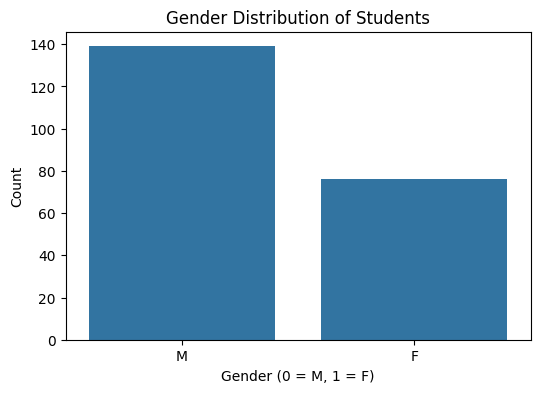

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution of Students')
plt.xlabel('Gender (0 = M, 1 = F)')
plt.ylabel('Count')
plt.show()

### 🔶 Step 3: Visualize Placement Status Count

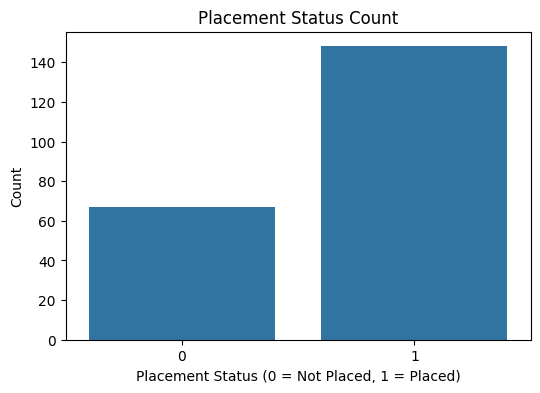

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='status')
plt.title('Placement Status Count')
plt.xlabel('Placement Status (0 = Not Placed, 1 = Placed)')
plt.ylabel('Count')
plt.show()

### 🔶 Step 4: Boxplot of Salary by Specialisation (for placed students)

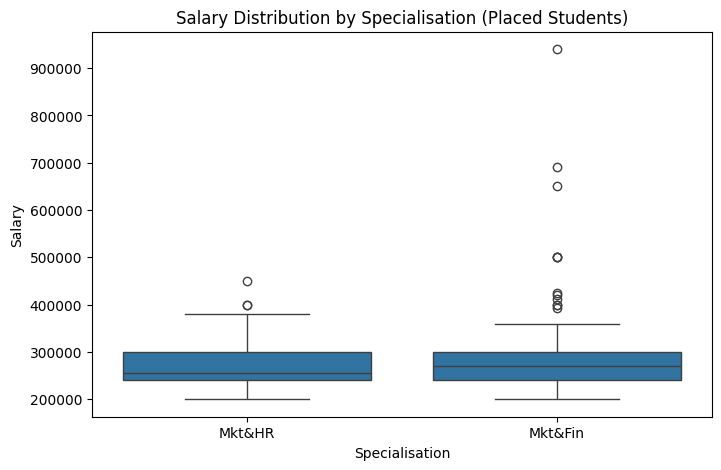

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df['status'] == 1], x='specialisation', y='salary')
plt.title('Salary Distribution by Specialisation (Placed Students)')
plt.xlabel('Specialisation')
plt.ylabel('Salary')
plt.show()

### 🔶 Step 5: Scatter plot of Average Academic Score vs Salary (only placed students)

In [ ]:
# Create a new column for average academic score
df['avg_academic_score'] = (df['10th %'] + df['12th %']) / 2

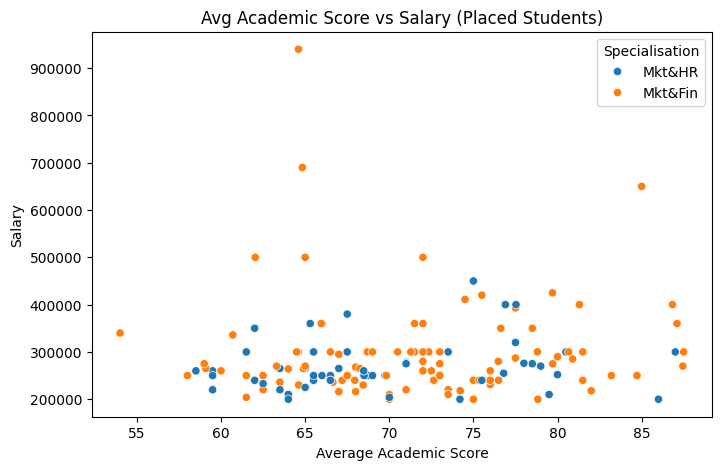

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df[df['status'] == 1], x='avg_academic_score', y='salary', hue='specialisation')
plt.title('Avg Academic Score vs Salary (Placed Students)')
plt.xlabel('Average Academic Score')
plt.ylabel('Salary')
plt.legend(title='Specialisation')
plt.show()


### 🔶 Step 6: Bar plot of Placement Rate by 12th Stream

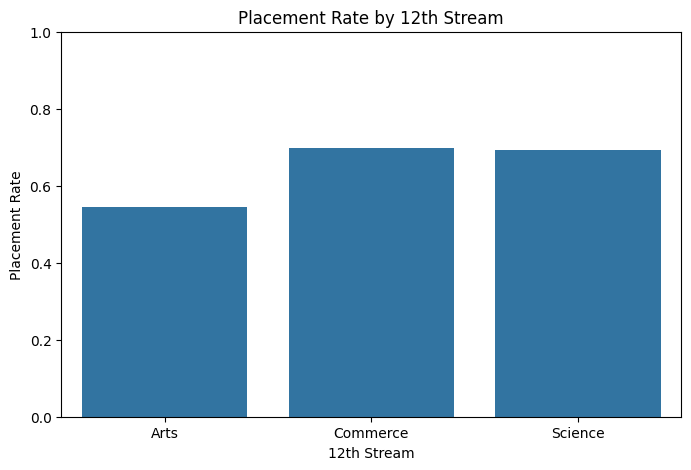

In [ ]:
placement_rate = df.groupby('12th Stream')['status'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=placement_rate, x='12th Stream', y='status')
plt.title('Placement Rate by 12th Stream')
plt.xlabel('12th Stream')
plt.ylabel('Placement Rate')
plt.ylim(0,1)
plt.show()


### 🔶 Step 7: Heatmap of correlation between numeric columns

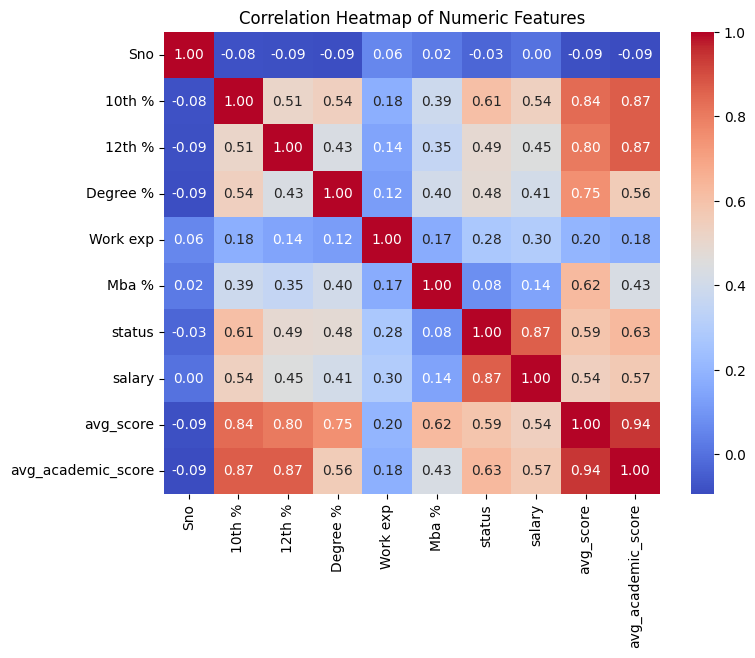

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
# Calculate correlation only on the numeric DataFrame
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()